# LENET ARCHITECTURE

In [1]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation


2.15.0


In [2]:
# Create an ImageDataGenerator for data augmentation and preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2)

In [3]:
# Define the path to your dataset directory
dataset_dir = 'DATASET'

# Set the batch size and number of classes
batch_size = 32
num_classes = 3

In [4]:
# Load and preprocess the dataset using the ImageDataGenerator

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 347 images belonging to 3 classes.


In [5]:
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 86 images belonging to 3 classes.


In [6]:
from tensorflow.keras.models import Sequential

MODEL=Sequential()
MODEL.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(3,3), input_shape=(224,224,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(3,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Flatten())
MODEL.add(Dense(256, activation='relu'))
MODEL.add(Dense(num_classes, activation='softmax'))

OPT    = tensorflow.keras.optimizers.Adam(0.001)

MODEL.compile(optimizer=OPT,loss='categorical_crossentropy',metrics=["accuracy", tensorflow.keras.metrics.Precision()])
MODEL.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 37, 37, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)              

In [7]:
model_path = "LENET.h5"

from keras.callbacks import ModelCheckpoint
M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [8]:
epochs = 200

In [9]:
history = MODEL.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[M]  # Add the callbacks here
)

Epoch 1/200


6/6 [==============================] - ETA: 0s - loss: 1.1506 - accuracy: 0.3055 - precision: 0.0000e+00
Epoch 1: accuracy improved from -inf to 0.30548, saving model to LENET.h5
6/6 [==============================] - 8s 1s/step - loss: 1.1506 - accuracy: 0.3055 - precision: 0.0000e+00 - val_loss: 1.0960 - val_accuracy: 0.3488 - val_precision: 0.0000e+00
Epoch 2/200


C:\Users\LIKHITH\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - ETA: 0s - loss: 1.0920 - accuracy: 0.3516 - precision: 0.0000e+00
Epoch 2: accuracy improved from 0.30548 to 0.35159, saving model to LENET.h5
6/6 [==============================] - 5s 857ms/step - loss: 1.0920 - accuracy: 0.3516 - precision: 0.0000e+00 - val_loss: 1.0906 - val_accuracy: 0.3488 - val_precision: 0.0000e+00
Epoch 3/200
6/6 [==============================] - ETA: 0s - loss: 1.0843 - accuracy: 0.4380 - precision: 0.0000e+00
Epoch 3: accuracy improved from 0.35159 to 0.43804, saving model to LENET.h5
6/6 [==============================] - 5s 864ms/step - loss: 1.0843 - accuracy: 0.4380 - precision: 0.0000e+00 - val_loss: 1.0832 - val_accuracy: 0.3488 - val_precision: 0.0000e+00
Epoch 4/200
6/6 [==============================] - ETA: 0s - loss: 1.0835 - accuracy: 0.3516 - precision: 0.7647
Epoch 4: accuracy did not improve from 0.43804
6/6 [==============================] - 6s 1s/step - loss: 1.0835 - accuracy: 0.3516 - precision: 0.764

6/6 [==============================] - 6s 981ms/step - loss: 0.6585 - accuracy: 0.7291 - precision: 0.8158 - val_loss: 0.9227 - val_accuracy: 0.6163 - val_precision: 0.7119
Epoch 26/200
6/6 [==============================] - ETA: 0s - loss: 0.6436 - accuracy: 0.7435 - precision: 0.7964
Epoch 26: accuracy did not improve from 0.75216
6/6 [==============================] - 5s 869ms/step - loss: 0.6436 - accuracy: 0.7435 - precision: 0.7964 - val_loss: 0.9811 - val_accuracy: 0.5930 - val_precision: 0.6164
Epoch 27/200
6/6 [==============================] - ETA: 0s - loss: 0.5768 - accuracy: 0.7695 - precision: 0.8417
Epoch 27: accuracy improved from 0.75216 to 0.76945, saving model to LENET.h5
6/6 [==============================] - 5s 871ms/step - loss: 0.5768 - accuracy: 0.7695 - precision: 0.8417 - val_loss: 1.0242 - val_accuracy: 0.5930 - val_precision: 0.6250
Epoch 28/200
6/6 [==============================] - ETA: 0s - loss: 0.5853 - accuracy: 0.7781 - precision: 0.8316
Epoch 28: acc

6/6 [==============================] - ETA: 0s - loss: 0.5227 - accuracy: 0.7896 - precision: 0.8123
Epoch 49: accuracy did not improve from 0.84726
6/6 [==============================] - 5s 877ms/step - loss: 0.5227 - accuracy: 0.7896 - precision: 0.8123 - val_loss: 0.9184 - val_accuracy: 0.5930 - val_precision: 0.6076
Epoch 50/200
6/6 [==============================] - ETA: 0s - loss: 0.6584 - accuracy: 0.7435 - precision: 0.7622
Epoch 50: accuracy did not improve from 0.84726
6/6 [==============================] - 6s 1s/step - loss: 0.6584 - accuracy: 0.7435 - precision: 0.7622 - val_loss: 0.9606 - val_accuracy: 0.6628 - val_precision: 0.6707
Epoch 51/200
6/6 [==============================] - ETA: 0s - loss: 0.5833 - accuracy: 0.7666 - precision: 0.7868
Epoch 51: accuracy did not improve from 0.84726
6/6 [==============================] - 5s 934ms/step - loss: 0.5833 - accuracy: 0.7666 - precision: 0.7868 - val_loss: 0.8354 - val_accuracy: 0.6744 - val_precision: 0.6912
Epoch 52/20

6/6 [==============================] - 5s 858ms/step - loss: 0.3038 - accuracy: 0.9049 - precision: 0.9159 - val_loss: 0.8086 - val_accuracy: 0.6628 - val_precision: 0.7089
Epoch 74/200
6/6 [==============================] - ETA: 0s - loss: 0.3061 - accuracy: 0.8934 - precision: 0.9021
Epoch 74: accuracy did not improve from 0.90490
6/6 [==============================] - 6s 1s/step - loss: 0.3061 - accuracy: 0.8934 - precision: 0.9021 - val_loss: 0.8661 - val_accuracy: 0.6279 - val_precision: 0.6625
Epoch 75/200
6/6 [==============================] - ETA: 0s - loss: 0.3189 - accuracy: 0.8847 - precision: 0.8982
Epoch 75: accuracy did not improve from 0.90490
6/6 [==============================] - 5s 849ms/step - loss: 0.3189 - accuracy: 0.8847 - precision: 0.8982 - val_loss: 0.8665 - val_accuracy: 0.6744 - val_precision: 0.6709
Epoch 76/200
6/6 [==============================] - ETA: 0s - loss: 0.3470 - accuracy: 0.8646 - precision: 0.8829
Epoch 76: accuracy did not improve from 0.9049

Epoch 98/200
6/6 [==============================] - ETA: 0s - loss: 0.2850 - accuracy: 0.8761 - precision: 0.8949
Epoch 98: accuracy did not improve from 0.90490
6/6 [==============================] - 5s 899ms/step - loss: 0.2850 - accuracy: 0.8761 - precision: 0.8949 - val_loss: 0.7947 - val_accuracy: 0.6977 - val_precision: 0.6988
Epoch 99/200
6/6 [==============================] - ETA: 0s - loss: 0.2953 - accuracy: 0.8847 - precision: 0.8935
Epoch 99: accuracy did not improve from 0.90490
6/6 [==============================] - 5s 852ms/step - loss: 0.2953 - accuracy: 0.8847 - precision: 0.8935 - val_loss: 0.9457 - val_accuracy: 0.6628 - val_precision: 0.6543
Epoch 100/200
6/6 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.8963 - precision: 0.9162
Epoch 100: accuracy did not improve from 0.90490
6/6 [==============================] - 5s 834ms/step - loss: 0.2693 - accuracy: 0.8963 - precision: 0.9162 - val_loss: 0.9463 - val_accuracy: 0.6628 - val_precision: 

6/6 [==============================] - 13s 2s/step - loss: 0.3337 - accuracy: 0.8646 - precision: 0.8836 - val_loss: 0.8135 - val_accuracy: 0.6977 - val_precision: 0.7229
Epoch 123/200
6/6 [==============================] - ETA: 0s - loss: 0.2973 - accuracy: 0.8905 - precision: 0.9132
Epoch 123: accuracy did not improve from 0.90490
6/6 [==============================] - 13s 2s/step - loss: 0.2973 - accuracy: 0.8905 - precision: 0.9132 - val_loss: 0.9376 - val_accuracy: 0.6744 - val_precision: 0.6867
Epoch 124/200
6/6 [==============================] - ETA: 0s - loss: 0.2961 - accuracy: 0.8963 - precision: 0.9245
Epoch 124: accuracy did not improve from 0.90490
6/6 [==============================] - 13s 2s/step - loss: 0.2961 - accuracy: 0.8963 - precision: 0.9245 - val_loss: 0.8506 - val_accuracy: 0.6628 - val_precision: 0.6867
Epoch 125/200
6/6 [==============================] - ETA: 0s - loss: 0.2152 - accuracy: 0.9078 - precision: 0.9179
Epoch 125: accuracy improved from 0.90490 to

Epoch 147/200
6/6 [==============================] - ETA: 0s - loss: 0.2921 - accuracy: 0.8790 - precision: 0.8830
Epoch 147: accuracy did not improve from 0.93084
6/6 [==============================] - 13s 2s/step - loss: 0.2921 - accuracy: 0.8790 - precision: 0.8830 - val_loss: 0.9926 - val_accuracy: 0.6163 - val_precision: 0.6386
Epoch 148/200
6/6 [==============================] - ETA: 0s - loss: 0.2913 - accuracy: 0.8991 - precision: 0.9083
Epoch 148: accuracy did not improve from 0.93084
6/6 [==============================] - 13s 2s/step - loss: 0.2913 - accuracy: 0.8991 - precision: 0.9083 - val_loss: 0.8696 - val_accuracy: 0.6628 - val_precision: 0.6829
Epoch 149/200
6/6 [==============================] - ETA: 0s - loss: 0.2109 - accuracy: 0.9164 - precision: 0.9347
Epoch 149: accuracy did not improve from 0.93084
6/6 [==============================] - 13s 2s/step - loss: 0.2109 - accuracy: 0.9164 - precision: 0.9347 - val_loss: 0.8069 - val_accuracy: 0.7209 - val_precision: 0.

6/6 [==============================] - ETA: 0s - loss: 0.3304 - accuracy: 0.8646 - precision: 0.8739
Epoch 171: accuracy did not improve from 0.94813
6/6 [==============================] - 13s 2s/step - loss: 0.3304 - accuracy: 0.8646 - precision: 0.8739 - val_loss: 0.8510 - val_accuracy: 0.7442 - val_precision: 0.7561
Epoch 172/200
6/6 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.9020 - precision: 0.9110
Epoch 172: accuracy did not improve from 0.94813
6/6 [==============================] - 13s 2s/step - loss: 0.2600 - accuracy: 0.9020 - precision: 0.9110 - val_loss: 0.7323 - val_accuracy: 0.7093 - val_precision: 0.7195
Epoch 173/200
6/6 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.9395 - precision: 0.9520
Epoch 173: accuracy did not improve from 0.94813
6/6 [==============================] - 13s 2s/step - loss: 0.2124 - accuracy: 0.9395 - precision: 0.9520 - val_loss: 0.6532 - val_accuracy: 0.7558 - val_precision: 0.7683
Epoch 174

6/6 [==============================] - ETA: 0s - loss: 0.1519 - accuracy: 0.9510 - precision: 0.9613
Epoch 195: accuracy did not improve from 0.95677
6/6 [==============================] - 32s 6s/step - loss: 0.1519 - accuracy: 0.9510 - precision: 0.9613 - val_loss: 0.8221 - val_accuracy: 0.7674 - val_precision: 0.7831
Epoch 196/200
6/6 [==============================] - ETA: 0s - loss: 0.1516 - accuracy: 0.9395 - precision: 0.9422
Epoch 196: accuracy did not improve from 0.95677
6/6 [==============================] - 30s 5s/step - loss: 0.1516 - accuracy: 0.9395 - precision: 0.9422 - val_loss: 1.0542 - val_accuracy: 0.7209 - val_precision: 0.7294
Epoch 197/200
6/6 [==============================] - ETA: 0s - loss: 0.1765 - accuracy: 0.9280 - precision: 0.9357
Epoch 197: accuracy did not improve from 0.95677
6/6 [==============================] - 32s 5s/step - loss: 0.1765 - accuracy: 0.9280 - precision: 0.9357 - val_loss: 0.8261 - val_accuracy: 0.7442 - val_precision: 0.7561
Epoch 198

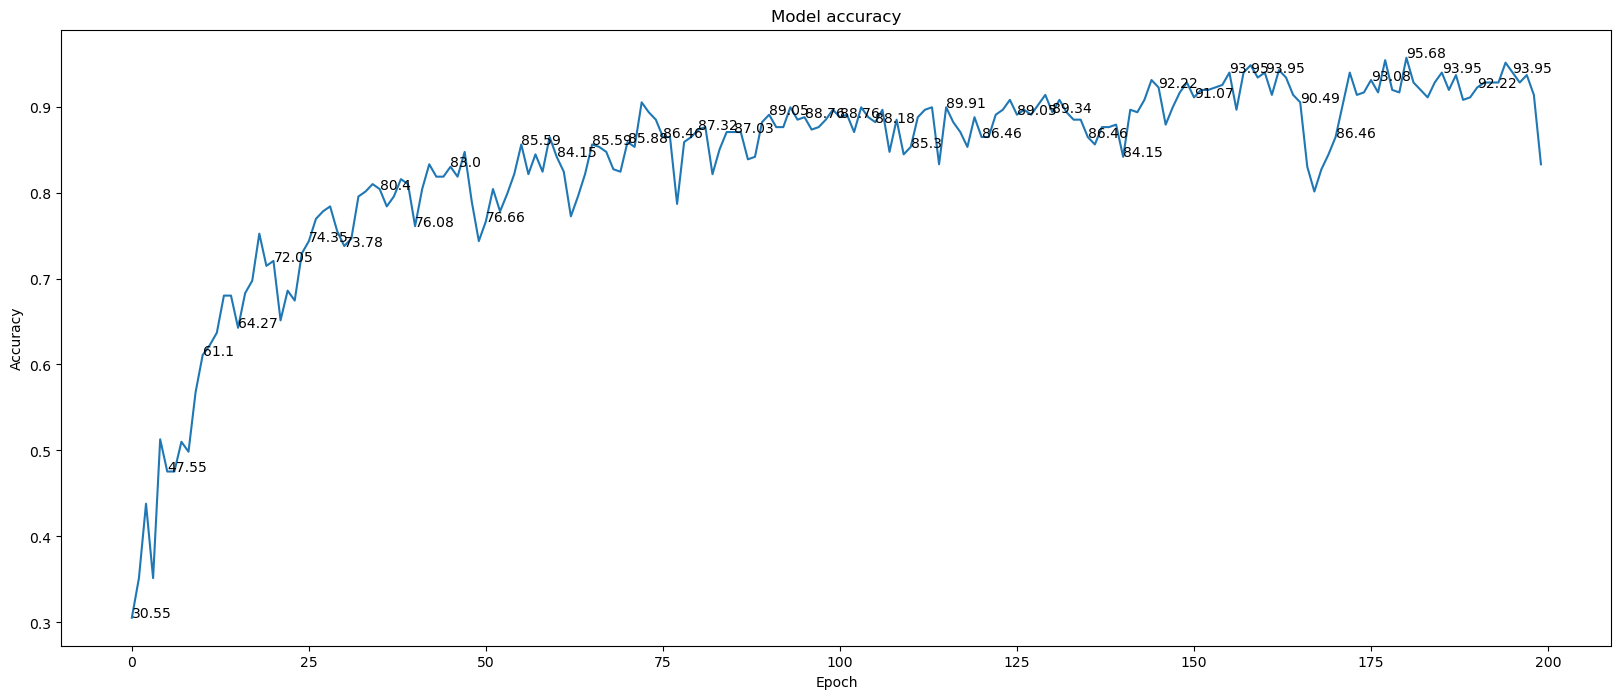

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

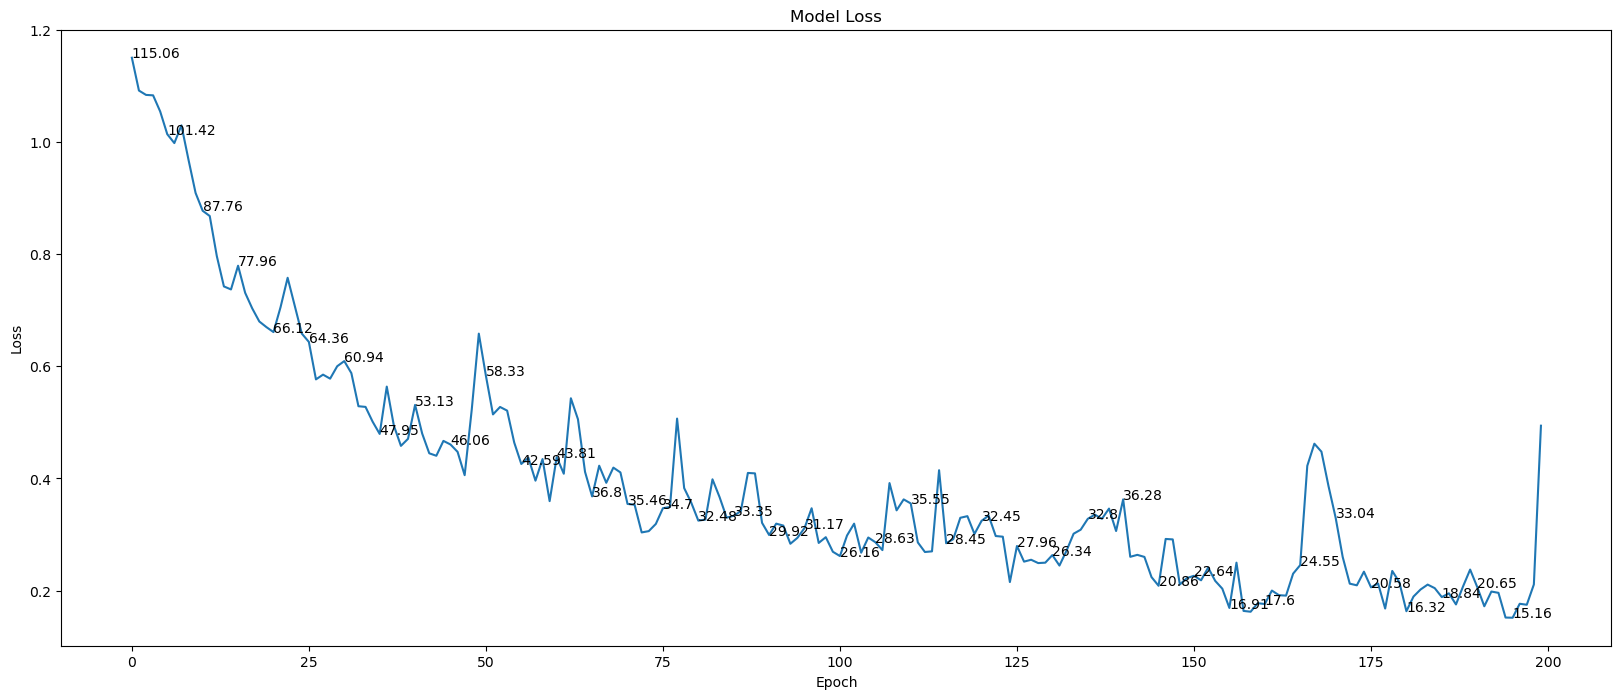

In [13]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()